In [2]:
import torch
import pandas as pd
import numpy as np
import linearpartition as lp
import matplotlib.pyplot as plt
import scipy

In [3]:
#parse the SHAPE data
uridine_shape = pd.read_csv('uridine.csv').fillna(float('-inf'))
num_u_shape = uridine_shape.iloc[1:].apply(pd.to_numeric, errors='coerce')
num_u_shape = num_u_shape.rename(columns = uridine_shape.iloc[0])
#parse the sequence data
full_seq = pd.read_csv('seq_identity.csv')
sequences = full_seq.set_index('Name')['Sequence']
#get sequence names
names = uridine_shape.iloc[0].tolist()


In [4]:
seq_bpps = dict()
for name in names:
    seq = sequences[name]
    bpmtx, fe = lp.partition(seq)
    bpp = pd.DataFrame(bpmtx).sort_values('prob', ascending=False)
    seq_bpps[name] = bpp

In [5]:
seq_bpvecs = dict()
for name in names:
    seq = sequences[name]
    bpp = seq_bpps[name]
    bpp_vector = np.array([
        min(
            (bpp['prob'][bpp['i'] == i].sum() + 
            bpp['prob'][bpp['j'] == i].sum()), 
            1.0)
        for i in range(0, len(seq))
    ])
    seq_bpvecs[name] = bpp_vector


In [6]:
logit_seqbp = dict()
for name in names:
    logit_seqbp[name] = - scipy.special.logit(
        seq_bpvecs[name]
    )

In [7]:
shape_dict = dict()
for name in names:
    if name[0] == 'L':
        shape_dict[name] = num_u_shape[name].values[47:1697]
    else:
        shape_dict[name] = num_u_shape[name].values[47:626]
    print(f"length of shape data for {name} is {len(shape_dict[name])}")
    print(f"length of sequence data for {name} is {len(logit_seqbp[name])}")

length of shape data for L1 is 1650
length of sequence data for L1 is 1650
length of shape data for L2 is 1650
length of sequence data for L2 is 1650
length of shape data for L3 is 1650
length of sequence data for L3 is 1650
length of shape data for L4 is 1650
length of sequence data for L4 is 1650
length of shape data for L5 is 1650
length of sequence data for L5 is 1650
length of shape data for L6 is 1650
length of sequence data for L6 is 1650
length of shape data for L7 is 1650
length of sequence data for L7 is 1650
length of shape data for L8 is 1650
length of sequence data for L8 is 1650
length of shape data for L9 is 1650
length of sequence data for L9 is 1650
length of shape data for L10 is 1650
length of sequence data for L10 is 1650
length of shape data for L11 is 1650
length of sequence data for L11 is 1650
length of shape data for L12 is 1650
length of sequence data for L12 is 1650
length of shape data for L13 is 1650
length of sequence data for L13 is 1650
length of shape d

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

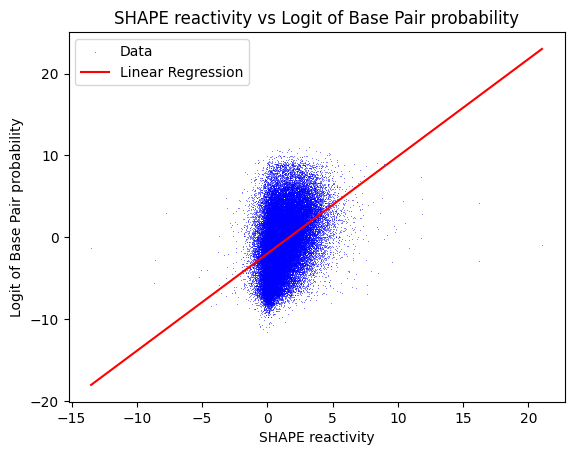

R^2: 0.15049552940025845
Coef: [1.18888254]
Intercept: -1.9964527250609585


In [9]:
shapes = np.concatenate(
    [shape_dict[name] for name in names]
)
logits = np.concatenate(
    [logit_seqbp[name] for name in names]
)
finite_mask = (shapes > -999) & np.isfinite(logits)
shapes = shapes[finite_mask].reshape(-1, 1)
logits = logits[finite_mask]

model = LinearRegression().fit(shapes, logits)
x_range = np.linspace(shapes.min(), shapes.max(), 1000).reshape(-1, 1)
y_range = model.predict(x_range)
plt.scatter(shapes, logits, linewidth=0, s = 0.2, color='blue', label='Data')
plt.plot(x_range, y_range, color='red', label='Linear Regression')
plt.xlabel('SHAPE reactivity')
plt.ylabel('Logit of Base Pair probability') 
plt.title('SHAPE reactivity vs Logit of Base Pair probability')
plt.legend()
plt.show()
print(
    f"R^2: {model.score(shapes, logits)}\n"
    f"Coef: {model.coef_}\n"
    f"Intercept: {model.intercept_}"
)

In [10]:
shape2prob_th = dict()
for name in names:
    shape2prob_th[name] = (shape_dict[name] < 0.25).astype(float)

In [11]:
def fractional_norm(v1, v2, p):
    return np.sum(np.abs(v1 - v2)**p)**(1/p)

for name in names:
    print(
        f"""Eucliean distance between {name} and the LinearPart prediction: {
            fractional_norm(
                shape2prob_th[name],
                seq_bpvecs[name],
                1
            )
        }"""
    )

Eucliean distance between L1 and the LinearPart prediction: 777.41933408119
Eucliean distance between L2 and the LinearPart prediction: 768.9446129959749
Eucliean distance between L3 and the LinearPart prediction: 717.9674010660008
Eucliean distance between L4 and the LinearPart prediction: 809.5079368529546
Eucliean distance between L5 and the LinearPart prediction: 724.8624604286741
Eucliean distance between L6 and the LinearPart prediction: 677.8324465307463
Eucliean distance between L7 and the LinearPart prediction: 751.2358301615274
Eucliean distance between L8 and the LinearPart prediction: 755.3786210395233
Eucliean distance between L9 and the LinearPart prediction: 784.7437035420717
Eucliean distance between L10 and the LinearPart prediction: 701.6180232015428
Eucliean distance between L11 and the LinearPart prediction: 736.5557612248019
Eucliean distance between L12 and the LinearPart prediction: 727.8891769813549
Eucliean distance between L13 and the LinearPart prediction: 79

In [12]:
#parse the SHAPE data
ψ_shape = pd.read_csv('n1mpsi.csv').fillna(float('-inf'))
num_ψ_shape = ψ_shape.iloc[1:].apply(pd.to_numeric, errors='coerce')
num_ψ_shape = num_ψ_shape.rename(columns = ψ_shape.iloc[0])

In [13]:
ψ_shape_dict = dict()
for name in names:
    if name[0] == 'L':
        ψ_shape_dict[name] = num_ψ_shape[name].values[47:1697]
    else:
        ψ_shape_dict[name] = num_ψ_shape[name].values[47:626]
    print(f"length of shape data for {name} is {len(ψ_shape_dict[name])}")
    print(f"length of sequence data for {name} is {len(sequences[name])}")

length of shape data for L1 is 1650
length of sequence data for L1 is 1650
length of shape data for L2 is 1650
length of sequence data for L2 is 1650
length of shape data for L3 is 1650
length of sequence data for L3 is 1650
length of shape data for L4 is 1650
length of sequence data for L4 is 1650
length of shape data for L5 is 1650
length of sequence data for L5 is 1650
length of shape data for L6 is 1650
length of sequence data for L6 is 1650
length of shape data for L7 is 1650
length of sequence data for L7 is 1650
length of shape data for L8 is 1650
length of sequence data for L8 is 1650
length of shape data for L9 is 1650
length of sequence data for L9 is 1650
length of shape data for L10 is 1650
length of sequence data for L10 is 1650
length of shape data for L11 is 1650
length of sequence data for L11 is 1650
length of shape data for L12 is 1650
length of sequence data for L12 is 1650
length of shape data for L13 is 1650
length of sequence data for L13 is 1650
length of shape d

In [14]:
ψ_seq_bpps = dict()
for name in names:
    seq = sequences[name]
    bpmtx, fe = lp.partition(seq, mod = 'm1psi')
    bpp = pd.DataFrame(bpmtx).sort_values('prob', ascending=False)
    ψ_seq_bpps[name] = bpp

In [15]:
ψ_seq_bpvecs = dict()
for name in names:
    seq = sequences[name]
    bpp = ψ_seq_bpps[name]
    ψ_bpp_vector = np.array([
        min(
            (bpp['prob'][bpp['i'] == i].sum() + 
            bpp['prob'][bpp['j'] == i].sum()), 
            1.0)
        for i in range(0, len(seq))
    ])
    ψ_seq_bpvecs[name] = ψ_bpp_vector

In [16]:
ψ_shape2prob_th = dict()
for name in names:
    ψ_shape2prob_th[name] = (ψ_shape_dict[name] < 0.25).astype(float)

In [17]:
for name in names:
    print(
        f"""Eucliean distance between {name} and the LinearPart prediction: {
            fractional_norm(
                ψ_shape2prob_th[name],
                seq_bpvecs[name],
                1
            )
        }"""
    )

Eucliean distance between L1 and the LinearPart prediction: 763.1368744716997
Eucliean distance between L2 and the LinearPart prediction: 760.041511947042
Eucliean distance between L3 and the LinearPart prediction: 712.8221085669496
Eucliean distance between L4 and the LinearPart prediction: 735.0854908672853
Eucliean distance between L5 and the LinearPart prediction: 711.0585456828746
Eucliean distance between L6 and the LinearPart prediction: 693.172418985262
Eucliean distance between L7 and the LinearPart prediction: 715.8581148393043
Eucliean distance between L8 and the LinearPart prediction: 771.3361384218007
Eucliean distance between L9 and the LinearPart prediction: 770.2527136691631
Eucliean distance between L10 and the LinearPart prediction: 700.0195570304318
Eucliean distance between L11 and the LinearPart prediction: 749.7034788157739
Eucliean distance between L12 and the LinearPart prediction: 769.6015868142679
Eucliean distance between L13 and the LinearPart prediction: 79

In [18]:
for name in names:
    print(
        f"""Eucliean distance between {name} and the LinearPart prediction: {
            fractional_norm(
                ψ_shape2prob_th[name],
                ψ_seq_bpvecs[name],
                1
            )
        }"""
    )

Eucliean distance between L1 and the LinearPart prediction: 777.3361566577607
Eucliean distance between L2 and the LinearPart prediction: 772.0258667462463
Eucliean distance between L3 and the LinearPart prediction: 723.1021288180176
Eucliean distance between L4 and the LinearPart prediction: 738.2258692078586
Eucliean distance between L5 and the LinearPart prediction: 726.8046558531614
Eucliean distance between L6 and the LinearPart prediction: 714.3777337732904
Eucliean distance between L7 and the LinearPart prediction: 728.1905459012416
Eucliean distance between L8 and the LinearPart prediction: 784.2279657819005
Eucliean distance between L9 and the LinearPart prediction: 782.1173306912025
Eucliean distance between L10 and the LinearPart prediction: 718.0513587215321
Eucliean distance between L11 and the LinearPart prediction: 764.6571204067475
Eucliean distance between L12 and the LinearPart prediction: 776.9517155990243
Eucliean distance between L13 and the LinearPart prediction: 